<a href="https://colab.research.google.com/github/Ahmed-Shaheen907/linear-regression/blob/main/Copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hassan Badran

ID: 52-2214

Tutorial: 2

---

Name: Ahmed Shaheen

ID: 52-5113

Tutorial: 2

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [868]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline
plt.style.use("seaborn")

# Try to read the 'car_prices.csv' file from the local directory. If it doesn't exist, fetch it from a GitHub repository.
try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-868-e9ed5017f542>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [869]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try to read the 'car_prices.csv' file from the local directory. If it doesn't exist, fetch it from a GitHub repository.
try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head(60)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,sedan,automatic,5xxgm4a70eg329048,co,4.6,8386.0mi,black,gray,"kia motors america, inc",$15100,$15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Crew Cab,automatic,3gnfk12387g117727,wa,3.6,100676.0mi,gray,black,lexus of tacoma at fife,$13900,$13600,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,ca,4.6,87860.0mi,white,beige,aaero sweet company,$10950,$14700,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,il,1.7,27819.0mi,gray,black,wells fargo dealer services,$26600,$20000,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,nv,4.9,4046.0mi,blue,gray,"kia motors america, inc",$12900,$13600,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


In [870]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [871]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
dtype: object

In [872]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [873]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         year   make  model   trim   body  transmission    vin  state  \
0      False  False  False  False  False         False  False  False   
1      False  False  False  False  False         False  False  False   
2      False  False  False  False  False         False  False  False   
3      False  False  False  False  False         False  False  False   
4      False  False  False  False  False         False  False  False   
...      ...    ...    ...    ...    ...           ...    ...    ...   
46573  False  False  False  False  False         False  False  False   
46574  False  False  False  False  False         False  False  False   
46575  False  False  False  False  False         False  False  False   
46576  False  False  False  False  False         False  False  False   
46577  False  False  False  False  False         False  False  False   

       condition  odometer  color  interior  seller    mmr  sellingprice 

In [874]:
df['body'].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [875]:
df['color'].unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

In [876]:
df['make'].unique()

array(['Hyundai', 'Toyota', 'Lexus', 'BMW', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-Benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'GMC', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'MINI', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land Rover', 'Suzuki', 'Mercury', 'HUMMER',
       'Saab', 'Maserati', 'FIAT', 'Geo', 'smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston Martin'], dtype=object)

In [877]:
df['model'].unique()

array(['Sonata', '4Runner', 'IS 250', 'X5', 'E-Series Van', 'Optima',
       'Avalanche', 'CTS', 'E-Class', 'Forte', 'Wrangler', 'G Sedan',
       'MKS', 'Soul', 'Ranger', 'Mazda6', 'Tundra', 'PT Cruiser',
       'Acadia', 'Mustang', 'Odyssey', 'X3', 'STS', 'F-150', 'Sienna',
       'Liberty', 'DTS', 'Sebring', 'Nitro', 'Tacoma', 'Elantra', 'Q7',
       'Maxima', 'Corvette', 'Grand Cherokee', 'FJ Cruiser', 'Fiesta',
       'Genesis', 'Town and Country', 'F-350 Super Duty', 'Z4', 'Murano',
       'Enclave', 'Altima', 'Sentra', 'R-Class', 'Sierra 1500', 'Cooper',
       'XJ', 'Edge', 'Focus', 'Avenger', 'Civic', 'Escape', 'Camry',
       'Encore', 'Accord', 'Sonic', 'Yukon', 'XF', 'Savana Cargo',
       'Fusion', '200', 'Cruze', 'MKX', 'Stratus', 'S60', 'Taurus',
       'Corolla', 'CR-V', 'Tucson', 'Charger', 'Lancer', 'Malibu',
       'Mazda3', 'Jetta', 'Elantra GT', '3 Series', 'Leaf',
       'Express Cargo', 'Outlander Sport', 'Venza', 'F-250 Super Duty',
       'Versa', 'Rogue', 'Imp

In [878]:
df['interior'].unique()

array(['gray', '—', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [879]:
df['transmission'].unique()


array(['automatic', 'manual'], dtype=object)

In [880]:
df['year'].unique()

array([2013, 2014, 2012, 2002, 2007, 2008, 2011, 2015, 2010, 2005, 2006,
       2009, 2004, 1998, 2001, 2003, 1996, 1997, 2000, 1999, 1995, 1991,
       1990, 1994, 1993, 1992])

In [881]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [882]:
df['color'].unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

In [883]:
mode_color = df['color'].mode().values[0]

print(f"The mode of the 'color' column is: {mode_color}")

The mode of the 'color' column is: black


In [884]:
df['color'] = df['color'].str.replace('—', 'black')

In [885]:
df['color'].unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', 'yellow', 'brown', 'turquoise',
       'orange', 'off-white', 'charcoal', 'pink', 'lime'], dtype=object)

In [886]:
df['interior'].unique()

array(['gray', '—', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [887]:
# Find the mode of the 'interior' column in the DataFrame and store it in 'new_interior'
new_interior = df['interior'].mode().values[0]
print(f"The mode of the 'interior' column is: {new_interior}")

The mode of the 'interior' column is: black


In [888]:
df['interior'] = df['interior'].str.replace('—', 'black')

In [889]:
df['interior'].unique()

array(['gray', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [890]:
# Remove the dollar sign ('$') from the 'sellingprice' column and replace it with an empty space
df['sellingprice'] = df['sellingprice'].str.replace('$', ' ')
# Convert the 'sellingprice' column to an integer data type
df['sellingprice'] = df['sellingprice'].astype(int)

<ipython-input-890-915dc6f17646>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sellingprice'] = df['sellingprice'].str.replace('$', ' ')


In [891]:
# Remove the dollar sign ('$') from the 'mmr' column and replace it with an empty space
df['mmr'] = df['mmr'].str.replace('$', ' ')
# Convert the 'mmr' column to an integer data type
df['mmr'] = df['mmr'].astype(int)

<ipython-input-891-7e3805697c0b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr'] = df['mmr'].str.replace('$', ' ')


In [892]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [893]:
# Removing mi in odometer
clean_and_convert = lambda x: int(''.join(filter(str.isdigit, x)))

df['odometer'] = df['odometer'].apply(clean_and_convert)

print(df)

       year      make         model         trim          body transmission  \
0      2013   Hyundai        Sonata          GLS         sedan    automatic   
1      2014    Toyota       4Runner          SR5           SUV    automatic   
2      2012     Lexus        IS 250         Base         Sedan    automatic   
3      2002       BMW            X5         4.4i           SUV    automatic   
4      2014      Ford  E-Series Van        E-250  E-Series Van    automatic   
...     ...       ...           ...          ...           ...          ...   
46573  2013      Ford          Edge           SE           SUV    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey       g sedan    automatic   
46575  2013       BMW      3 Series         328i         Sedan    automatic   
46576  2013    Toyota         Camry           LE         Sedan    automatic   
46577  2013       Kia           Rio           LX         Sedan    automatic   

                     vin state  condition  odometer

In [894]:
# making the car body type all be lower cased
df['body'] = df['body'].str.lower()
Hbody = df['body'].head()
print(Hbody)

0           sedan
1             suv
2           sedan
3             suv
4    e-series van
Name: body, dtype: object


In [895]:
# Replace 'body' categories with more generalized types
df['body'] = np.where(df['body'].str.contains('sedan'), 'Sedan', df['body'])
df['body'] = np.where(df['body'].str.contains('coupe'), 'Coupe', df['body'])
df['body'] = np.where(df['body'].str.contains('convertible'), 'Convertible', df['body'])
df['body'] = np.where(df['body'].str.contains('hatchback'), 'Hatchback', df['body'])
df['body'] = np.where(df['body'].str.contains('suv'), 'SUV', df['body'])
df['body'] = np.where(df['body'].str.contains('van'), 'Minivan', df['body'])
df['body'] = np.where(df['body'].str.contains('wagon'), 'Wagon', df['body'])
df['body'] = np.where(df['body'].str.contains('cab'), 'Pickup Truck', df['body'])
df['body'] = np.where(df['body'].str.contains('supercrew'), 'Pickup Truck', df['body'])
df['body'] = np.where(df['body'].str.contains('koup'), 'Coupe', df['body'])

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,504040,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,178460,gray,black,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,211220,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,1453030,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,67140,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

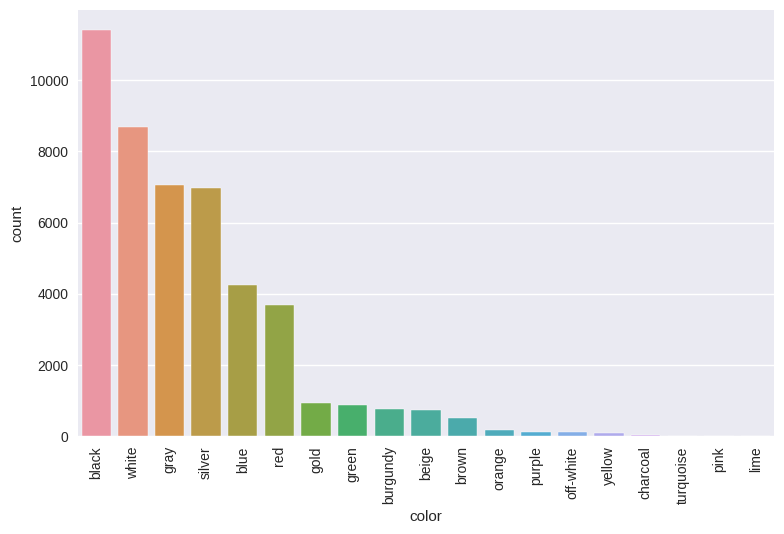

In [896]:
# Calculate the count of each color and sort them in descending order
color_counts = df['color'].value_counts().sort_values(ascending=False)

sns.countplot(x='color', data=df, order=color_counts.index)
plt.xticks(rotation=90)
plt.tight_layout()

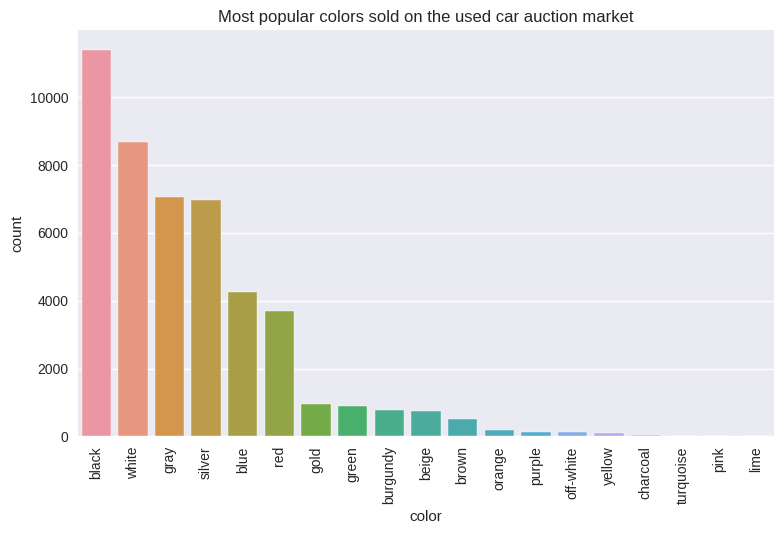

In [897]:
# Group the data by 'color' and count the number of occurrences of each color
large_to_small = df.groupby('color').size().sort_values(ascending=False)
# Create a count plot, ordered by the count of each color in descending order
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')

plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

**Answer for Q1**: Your answer here

In [898]:
# Calculate the count of each 'make' in the DataFrame and store it in make_counts
make_counts = df['make'].value_counts()
# Extract the top 3 most common 'make' values and store them in most_common_make
most_common_make = make_counts.head(3)

print("The most common 3 values in the 'make' column are:")
print(most_common_make)

The most common 3 values in the 'make' column are:
Ford         7871
Chevrolet    5322
Nissan       4297
Name: make, dtype: int64


**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

**Answer for Q2**: Your answer here

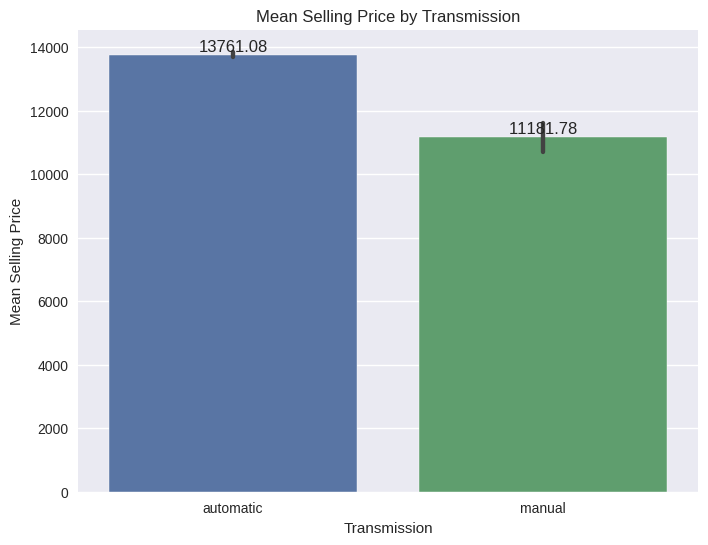

In [899]:
# Group the data by 'transmission' and calculate the mean selling price for each group
transmission_prices = df.groupby('transmission')['sellingprice'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='transmission', y='sellingprice', data=df) # Create a bar plot using Seaborn, with 'transmission' on the x-axis and 'sellingprice' on the y-axis

# Add text labels to each bar, displaying the mean selling price with two decimal places
for index, row in transmission_prices.iterrows():
    plt.text(index, row['sellingprice'], f'{row["sellingprice"]:.2f}', ha='center', va='bottom')

plt.xlabel('Transmission')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Transmission')
plt.show()

Automatic cars, on average, sell for a higher price than manual cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

**Answer for Q3**: Your answer here

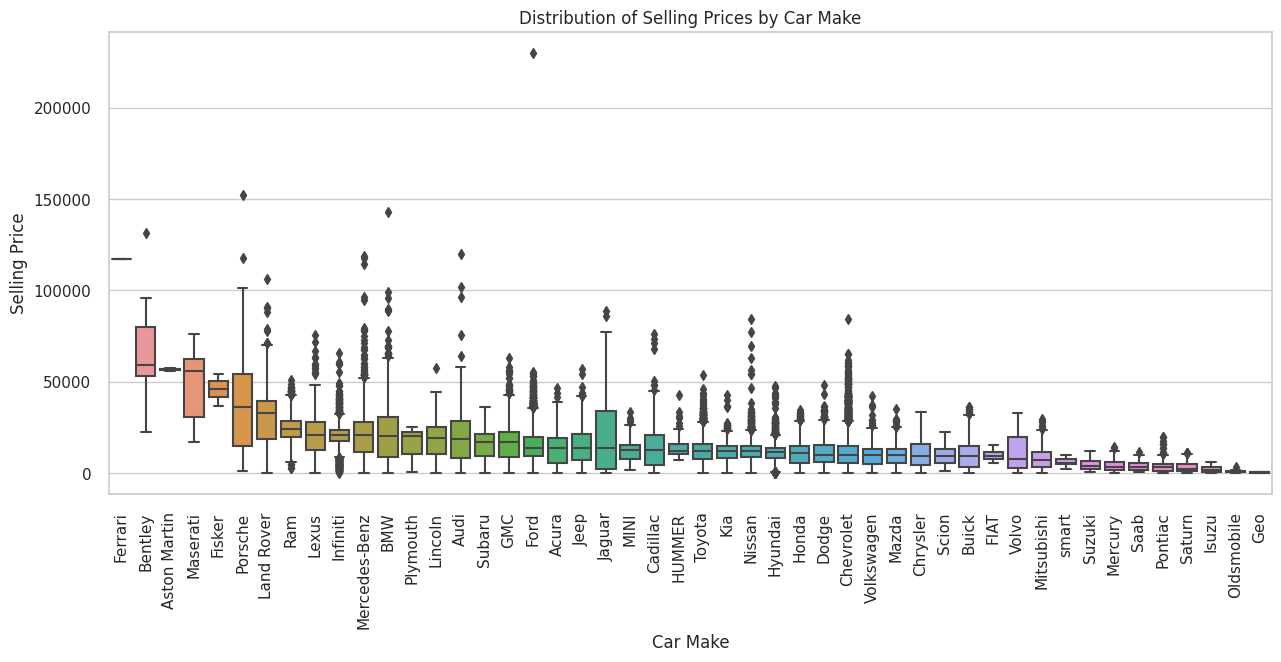

In [900]:
plt.figure(figsize=(15, 6))

# Create a box plot using Seaborn, with 'make' on the x-axis and 'sellingprice' on the y-axis
# We specify the order based on the median selling price in descending order
sns.set(style="whitegrid")
sns.boxplot(x="make", y="sellingprice", data=df, order=df.groupby('make')['sellingprice'].median().sort_values(ascending=False).index)

plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Prices by Car Make')

plt.show()

car makes that have the widest distribution of selling prices [they have the longest boxes]:

1.   porche
2.   maserati
3.   jaguar

car makes that are the most expensive [they have the highst median]:

1.   Ferrari
2.   Bentley
3.   Astin Martin



**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

**Answer for Q4**: Your answer here

<Axes: xlabel='odometer', ylabel='sellingprice'>

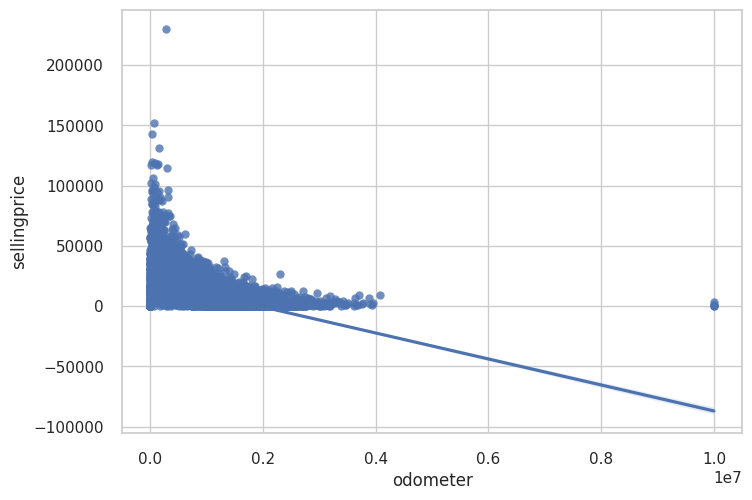

In [901]:
sns.regplot (data=df, x='odometer', y='sellingprice')

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

**Answer for Q5**: Your answer here

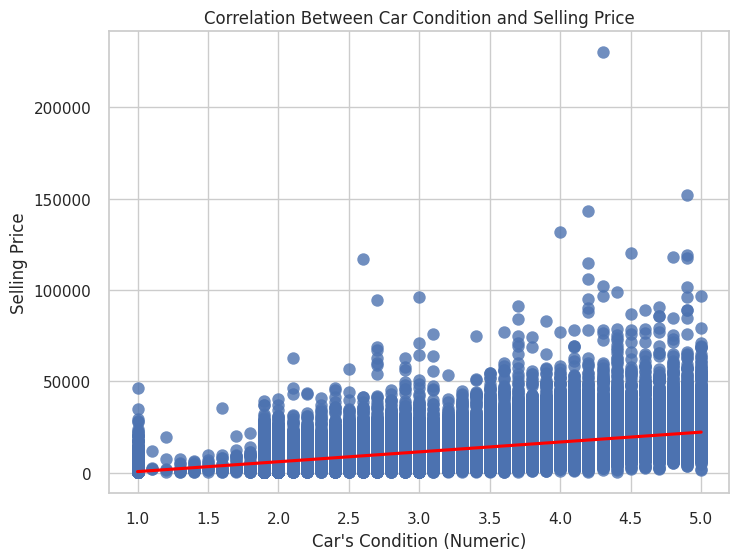

In [902]:
# Create a scatter plot with a line of best fit
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.regplot(x='condition', y='sellingprice', data=df, scatter_kws={"s": 80}, line_kws={"color": "red"})

plt.xlabel("Car's Condition (Numeric)")
plt.ylabel('Selling Price')
plt.title('Correlation Between Car Condition and Selling Price')

# Show the plot
plt.show()

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**


**Answer for Q6**: Your answer here

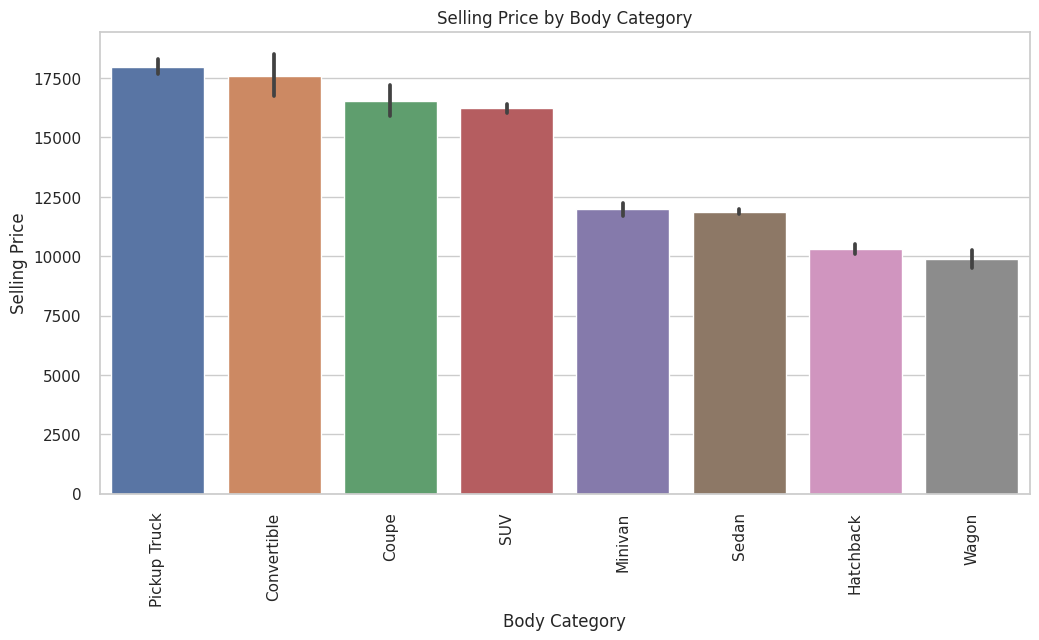

In [903]:
# Group the data by 'body' and calculate the mean selling price for each group
body_prices = df.groupby('body')['sellingprice'].mean()

# Sort the body types by mean selling price in descending order and get the order based on the index
sorted_body_order = body_prices.sort_values(ascending=False).index

# Create a bar plot using Seaborn, with 'body' on the x-axis and 'sellingprice' on the y-axis
# We specify the order based on the sorted body order
plt.figure(figsize=(12, 6))
sns.barplot(x='body', y='sellingprice', data=df, order=sorted_body_order)

plt.title('Selling Price by Body Category')
plt.xlabel('Body Category')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)

plt.show()

most expensive is pickup truck, and the least expensive is the wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [904]:
categorical_columns = ['transmission','make','body']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')



# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

df_encode.head()


Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'vin' 'state'
 'condition' 'odometer' 'color' 'interior' 'seller' 'mmr' 'sellingprice'
 'saledate']

Number of rows and columns in the dataset: (46578, 16)

Columns in data frame after encoding dummy variable:
 ['year' 'model' 'trim' 'vin' 'state' 'condition' 'odometer' 'color'
 'interior' 'seller' 'mmr' 'sellingprice' 'saledate' 'transmission_manual'
 'make_Aston Martin' 'make_Audi' 'make_BMW' 'make_Bentley' 'make_Buick'
 'make_Cadillac' 'make_Chevrolet' 'make_Chrysler' 'make_Dodge' 'make_FIAT'
 'make_Ferrari' 'make_Fisker' 'make_Ford' 'make_GMC' 'make_Geo'
 'make_HUMMER' 'make_Honda' 'make_Hyundai' 'make_Infiniti' 'make_Isuzu'
 'make_Jaguar' 'make_Jeep' 'make_Kia' 'make_Land Rover' 'make_Lexus'
 'make_Lincoln' 'make_MINI' 'make_Maserati' 'make_Mazda'
 'make_Mercedes-Benz' 'make_Mercury' 'make_Mitsubishi' 'make_Nissan'
 'make_Oldsmobile' 'make_Plymouth' 'make_Pontiac' 'make_Porsche'
 'make_Ram' 'make_

,year,model,trim,vin,state,condition,odometer,color,interior,seller,...,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon
0,2013,Sonata,GLS,5npeb4acxdh702805,ma,3.9,504040,black,gray,the hertz corporation,...,0,0,0,0,0,0,0,0,1,0
1,2014,4Runner,SR5,jtezu5jr2e5064567,fl,4.9,178460,gray,black,award auto sales and leasing inc,...,0,0,0,0,0,0,0,1,0,0
2,2012,IS 250,Base,jthbf5c24c5168599,fl,4.1,211220,silver,black,lexus financial services,...,0,0,0,0,0,0,0,0,1,0
3,2002,X5,4.4i,5uxfb33562lh33864,fl,1.9,1453030,black,black,peddle llc,...,0,0,0,0,0,0,0,1,0,0
4,2014,E-Series Van,E-250,1ftne2ew0eda31832,wa,4.9,67140,white,gray,u-haul,...,0,0,0,0,0,1,0,0,0,0


In [905]:
numerical_columns = ['condition', 'year', 'odometer']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode.head()

,year,model,trim,vin,state,condition,odometer,color,interior,seller,...,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon
0,0.92,Sonata,GLS,5npeb4acxdh702805,ma,0.725,0.050403,black,gray,the hertz corporation,...,0,0,0,0,0,0,0,0,1,0
1,0.96,4Runner,SR5,jtezu5jr2e5064567,fl,0.975,0.017845,gray,black,award auto sales and leasing inc,...,0,0,0,0,0,0,0,1,0,0
2,0.88,IS 250,Base,jthbf5c24c5168599,fl,0.775,0.021121,silver,black,lexus financial services,...,0,0,0,0,0,0,0,0,1,0
3,0.48,X5,4.4i,5uxfb33562lh33864,fl,0.225,0.145302,black,black,peddle llc,...,0,0,0,0,0,0,0,1,0,0
4,0.96,E-Series Van,E-250,1ftne2ew0eda31832,wa,0.975,0.006713,white,gray,u-haul,...,0,0,0,0,0,1,0,0,0,0


In [906]:
# Define a list of columns to drop
columns_to_drop = [	'vin', 'trim',	'color',	'interior',	'seller',	'mmr',	'saledate', 'state', 'model', 'saledate']

#		model	trim			vin	state			color	interior	seller	mmr	sellingprice	saledate
#'transmission','make','body','condition','odometer','year'

# Use the drop method to remove the specified columns
df_encode = df_encode.drop(columns=columns_to_drop)

df_encode.head()

,year,condition,odometer,sellingprice,transmission_manual,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,...,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon
0,0.92,0.725,0.050403,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.96,0.975,0.017845,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.88,0.775,0.021121,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.48,0.225,0.145302,3200,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.96,0.975,0.006713,22100,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [907]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [908]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

## Model Evaluation

_Evaluate the model you applied._

In [909]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  5447.509814688931
R^2 obtained is: 0.6788013037728275


In [910]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.6844463860601551
The median absolute error (MAE) is:  2644.951023529782


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.

An R-squared value of 0.67 is a decent level (not over fitting) of explanation. However, there's room for improvement, and the model doesn't capture the full complexity of used car price prediction. The attributes 'transmission,' 'make,' and 'body' were chosen because they are often key factors affecting used car prices and can provide significant insights into pricing patterns. Other variables like 'vin,' 'trim,' 'color,' and 'saledate' may contain less relevant or redundant information for price prediction, making them less ideal for this specific modeling task. A recomendation can be that the attributes dint have high colleration between one another for a better outcome.